# Poor_Att

## 1.5 - Students with Poor Attendance

### This ipynb carries out the same task as the Poor_Att_Separate ipynb. The only difference is that this notebook finds the overall department and student averages over two modules, in order to create an overall poor attendance dataframe and visualisation.

## Task Description

Write a Python program to use attendance records in the database and find out
a list of students with poor attendance. You should come up with the details of
the criteria to identify those students. For example, if the average attendance of
a student in the current semester is much less than the department average, then
student id should be included in the list.
Student IDs must be sorted by their average attendance. The list should include
the weekly attendance. The program should highlight the attendance of a student
in a week if it is higher than the department average.Additionally, the program appropriately visualises the weekly attendance records
of each module and student.
Save the program as Poor_Att.ipynb.

Firstly, necessary modules are imported into the notebook.

In [1]:
# Import modules
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Define Variables

Note: The order you enter the modules in does not matter.

In [2]:
def define_variables_3():
    """
    This function prompts the user to enter two module codes so they can be
    assigned to two variables.
    
    Args:
    None
    
    Returns:
    module_code_1, module_code_2 (str): Module codes entered by the user.
    """
    module_code_1 = input("Enter a module code (e.g. 22COA122):")
    module_code_2 = input("Enter a module code (e.g. 22COA111):")
    return(module_code_1, module_code_2)

## Read data from sql database

In [3]:
def read_sql_to_pd(module_code_1, module_code_2):
    """
    This function reads the attendance and sessions tables for both module from
    the SQLite database they are stored in (a total of four tables read in).
    
    Args:
    module_code_1, module_code_2 (str): Module codes for each dataframe.
    
    Returns:
    df_att_1, df_ssn_1, df_att_2, df_ssn_2 (pd.Dataframes): four dataframes of
    attendance and sessions data for two module codes.
    """
    conn = sqlite3.connect("CWDatabase.db")
    try:
        df_att_1 = pd.read_sql(f"SELECT * FROM \n\
        '{module_code_1}ModuleRegister_attendance'",
                               conn, index_col = ['s_id'])
        df_ssn_1 = pd.read_sql(f"SELECT * FROM \n\
        '{module_code_1}ModuleRegister_sessions'",
                               conn, index_col = ['s_id'])
        df_att_2 = pd.read_sql(f"SELECT * FROM \n\
        '{module_code_2}ModuleRegister_attendance'",
                               conn, index_col = ['s_id'])
        df_ssn_2 = pd.read_sql(f"SELECT * FROM \n\
        '{module_code_2}ModuleRegister_sessions'",
                               conn, index_col = ['s_id'])
    except sqlite3.OperationalError:
        print(f"Error: No table for module codes '{module_code_1}' \n\
        or '{module_code_2}' found in the database.")
    
    conn.close()
    return(df_att_1, df_ssn_1, df_att_2, df_ssn_2)

## Modify and merge Attendance & Sessions dataframes

Note: While the initial dataframe has Na values for students who have authorised absences, I have opted to use fillna(0) to view these as absent regardless of the circumstances. While I understand that this is not the most optimal method, this is the logic I have used in order to determine how the students attendances are calculated.

This same logic will be used consistently throughout the entire notebook.

In [4]:
def modify_df_1(df_att_1, df_ssn_1):
    """
    This function modifies df_att_1 by tranposing, filling na values,
    merging with sessions table, and calculating the weekly attendance for
    that module.
    
    Args:
    df_att_1, df_ssn_1 (pd.DataFrame): DataFrames containing attendance and
    sessions data.
    
    Returns:
    stu_week_att_1 (pd.DataFrame): Merged dataframe containing both attendance
    and session data for module code 1 in one dataframe.
    stu_avg_module_1 (pd.DataFrame): New dataframe showing average weekly
    attendance data for all students in module code 1.
    """
    
    df_att_1 = df_att_1.T
    #fill na with 0 so NaN does not hinder avg calculation
    df_att_1 = df_att_1.fillna(0)
    # make the 's_id' in integer format
    df_att_1.index = df_att_1.index.astype(int)
    df_ssn_1.index = df_ssn_1.index.astype(int)
    # merge both dataframes
    stu_week_att_1 = pd.merge(df_att_1, df_ssn_1,
                              left_index=True, right_index=True, how='inner')
    # ensure index is still labelled correctly
    stu_week_att_1 = stu_week_att_1.rename_axis('s_id', axis = 0)    
    #find weekly mean attendance in percentages
    stu_avg_module_1 = stu_week_att_1.groupby('Week').mean().mul(100)
    
    stu_avg_module_1 = stu_avg_module_1.T
    # add index name as s_id
    stu_avg_module_1.index.names = ['s_id']

    # add new row for overall weekly attendance for all students
    stu_avg_module_1.loc['wkly_avg_1'] = stu_avg_module_1.mean()
    return(stu_week_att_1, stu_avg_module_1)

In [5]:
def modify_df_2(df_att_2, df_ssn_2):
    """
    This function modifies df_att_2 by tranposing, filling na values, merges
    with sessions table, and calculating the weekly attendance for that
    module.
    
    Args:
    df_att_2, df_ssn_2 (pd.DataFrame): DataFrames containing attendance and
    sessions data.
   
    Returns:
    stu_week_att_2 (pd.DataFrame): Merged dataframe containing both attendance
    and session data for module code 2 in one dataframe.
    stu_avg_module_2 (pd.DataFrame): New dataframe showing average weekly
    attendance data for all students in module code 2.
    """
    
    df_att_2 = df_att_2.T
    #fill na with 0 so NaN does not hinder avg calculation
    df_att_2 = df_att_2.fillna(0)
    # make the 's_id' in integer format
    df_att_2.index = df_att_2.index.astype(int)
    df_ssn_2.index = df_ssn_2.index.astype(int)
    # merge both dataframes
    stu_week_att_2 = pd.merge(df_att_2, df_ssn_2,
                              left_index=True, right_index=True, how='inner')
    # ensure index is still labelled correctly
    stu_week_att_2 = stu_week_att_2.rename_axis('s_id', axis = 0)
   
    #find weekly mean attendance in percentages
    stu_avg_module_2 = stu_week_att_2.groupby('Week').mean().mul(100)
    
    stu_avg_module_2 = stu_avg_module_2.T
    # add index name as s_id
    stu_avg_module_2.index.names = ['s_id']

    # add new row for overall weekly attendance for all students
    stu_avg_module_2.loc['wkly_avg_2'] = stu_avg_module_2.mean()
    return(stu_week_att_2,stu_avg_module_2)

## Merge dataframes for both modules

In [6]:
def merge_both_modules(stu_week_att_1,stu_week_att_2):
    """
    This function merges the two dataframes of the two different modules
    into one large dataframe.
    
    Args:
    stu_week_att_1,stu_week_att_2 (pd.DataFrame): DataFrames containing
    student and week wise attendance for the first and second modules
    respectively.
    
    Returns:
    merged_df (pd.DataFrame): Merged dataframe containing data of both
    modules together.
    """
    merged_df = pd.concat([stu_week_att_1, stu_week_att_2], axis = 0)
    return(merged_df)

## Use merged_df to find overall averages over both modules

In [7]:
def wkly_stu_avg_merged(merged_df):
    """
    This function calculates the average weekly attendance for each
    student across both modules, as well as the overall weekly average
    for all students in both modules.
    
    Args:
    merged_df (pd.DataFrame): Merged dataframe containing data of both
    modules together.
    
    Returns:
    stu_avg_module (pd.DataFrame): Dataframe of overall weekly average
    attendances over both modules.
    """
    #find weekly mean attendance in percentages
    stu_avg_module = merged_df.groupby('Week').mean().mul(100)
    
    stu_avg_module = stu_avg_module.T
    
    stu_avg_module.index.names = ['s_id']

    # add new row for overall weekly attendance for all students
    stu_avg_module.loc['wkly_avg'] = stu_avg_module.mean()
    stu_avg_module['stu_avg'] = stu_avg_module.mean(axis = 1)
    return(stu_avg_module)

## Create & colour poor attendance table

In [8]:
def create_poor_att_df(stu_avg_module):
    """
    This function creates a new dataframe containing only data for students
    with poor attendance (less than half the dept_avg). It then sorts the data
    in ascending order of average attendance.
    
    Args:
    stu_avg_module (pd.DataFrame): Dataframe of overall weekly average
    attendances over both modules.
    
    Returns:
    poor_att_df (pd.DataFrame): Dataframe of overall weekly average
    attendances over both modules, filtered only to students with poor
    attendance; less than half the departmental average.
    dept_avg (str): Overall departmental average attendance over both
    modules.
    """
    dept_avg = stu_avg_module.iloc[-1,-1]
    # create a new df which filters for poor att students
    poor_att_df = stu_avg_module.loc[stu_avg_module['stu_avg'] < dept_avg/2]
    # Sort the rows by the "stu_avg" column in ascending order
    poor_att_df = poor_att_df.sort_values('stu_avg', ascending=True)
    return(poor_att_df, dept_avg)

def highlight_attendance_2(value, dept_avg):
    """
    This function highlights the cells of a dataframe green if their
    value is greater than the department average.
    
    Args:
    value (float): cell value of a dataframe
    
    Returns:
    str: styling string that can be applied to a dataframe.
    """
    if value > dept_avg:
        color = 'green'
    else:
        color = ''
    return f'background-color: {color}'

def display_coloured_table(poor_att_df, highlight_attendance, dept_avg):
    """
    This function displays the poor attendace table, having applied th
    colour coding function so that a data point is green if the student
    attendance for that week is greater than department average.
    
    Args:
    poor_att_df (pd.DataFrame): Dataframe of students with poor att.
    highlight_attendance (function): function which highlights cells
    green according to the criteria set. 
    dept_avg (float): Overall department average attendance value.
    
    Returns:
    str: styling string that can be applied to a dataframe.
    """
    poor_att_df_colour = poor_att_df.style.applymap\
    (lambda x:highlight_attendance(x, dept_avg))
    
    return(poor_att_df_colour)

## Create a sample dataframe

In [9]:
def sample_df_poor_att(stu_avg_module, poor_att_df):
    """
    This function randomly samples 5 students from poor_att_df
    and then appends the overall weekly average attendance for the
    module.
    
    Args:
    poor_att_df (pd.DataFrame): Dataframe of students with poor att.
    stu_avg_module (pd.DataFrame): Dataframe containing the overall
    weekly average attendance in the module.
    
    Returns:
    stu_random (pd.DataFrame): A dataframe containing the attendance
    data for the 5 randomly selected students.
    wkly_avg_module (pd.DataFrame): A dataframe with the overall weekly
    average attendance for the module.
    """
    # Obtain avg weekly att for the all students in the module
    wkly_avg_module = stu_avg_module.iloc[-1]
    
    # Set a seed
    np.random.seed(12) #remove line if you want new values every run
    
    # Create a new df which takes a random sample of 5 from poor_att_df
    stu_random = poor_att_df.sample(n = 5)
    # add the weekly avg attendance for the module
    stu_random = stu_random.append(wkly_avg_module)
    # Remove the final column which is not needed for the plot
    stu_random = stu_random.drop(stu_random.columns[-1], axis = 1)
    return(stu_random, wkly_avg_module)

## Create visualisation

In [10]:
def poor_att_sample_graph(stu_avg_module_1, stu_avg_module_2, stu_random, module_code_1, module_code_2):
    """
    This function plots a scatter and a line plot on the same graph.
    The scatter contains values of a students weekly attendance,
    whereas the line is the overall weekly average attendance for
    the whole module. Each new student ID is presented on a new graph
    so that the data points can be clearly visualised.
    
    Args:
    stu_avg_module_1 (pd.DataFrame): Dataframe containing overall weekly
    average attendance for module 1.
    stu_avg_module_2 (pd.DataFrame):Dataframe containing overall weekly
    average attendance for module 2.
    stu_random (pd.DataFrame): Dataframe containing the 5 randomly sampled
    students with poor attendance.
    module_code_1, module_code_2 (str): Module codes defined by user.
  
    Returns:
    None: A series of graphs are displayed.
    """
    # plot the lines
    x1 = range(1, stu_avg_module_1.shape[1] + 1)
    y1 = stu_avg_module_1.loc['wkly_avg_1']
    x2 = range(1, stu_avg_module_2.shape[1] + 1)
    y2 = stu_avg_module_2.loc['wkly_avg_2']
    
    # plot the scatter

    colors = ['b', 'g', 'r', 'c', 'm']
    
    x = range(1,stu_random.shape[1]+1)
    for i, (index, row) in enumerate(stu_random.iloc[:-1].iterrows()):
        plt.scatter(x , row, color=colors[i % len(colors)], label = index)
        
        plt.plot(x1,y1, label = f'{module_code_1}')
        plt.plot(x2,y2, label = f'{module_code_2}')

        plt.xlabel('Week')
        plt.ylabel('Average Attendance %')
        plt.title('Weekly Attendance for Students with Poor Attendance')
        plt.legend(loc = 'upper right')
        plt.xticks(x)
        # Show the plot
        plt.show()

## Main Code

In [11]:
def main_poor_att_2():
    """
    This function is the main function that calls all the other functions
    previously created in this notebook.
    It also displays the poor attendance table with the colour code, the
    dataframe of the 5 random sampled students, and the visualisations of 
    the weekly attendance of these 5 students
    
    Args:
    None
    
    Returns:
    None
    """
    module_code_1, module_code_2 = define_variables_3()
    df_att_1, df_ssn_1, df_att_2, df_ssn_2 = read_sql_to_pd(module_code_1,
                                                            module_code_2)
    
    stu_week_att_1,stu_avg_module_1 = modify_df_1(df_att_1, df_ssn_1)
    stu_week_att_2,stu_avg_module_2 = modify_df_2(df_att_2, df_ssn_2)
    merged_df = merge_both_modules(stu_week_att_1,stu_week_att_2)
    stu_avg_module = wkly_stu_avg_merged(merged_df)
    poor_att_df, dept_avg = create_poor_att_df(stu_avg_module)   
    poor_att_df_colour = display_coloured_table(poor_att_df,
                                                highlight_attendance_2,
                                                dept_avg)
    display(poor_att_df_colour)
    
    stu_random, wkly_avg_module = sample_df_poor_att(stu_avg_module,
                                                     poor_att_df)
    print(f"\nAttendance record for random sample of \n\
    students with low attendance:")
    display(stu_random)
    poor_att_vis = poor_att_sample_graph(stu_avg_module_1, stu_avg_module_2,
                                         stu_random, module_code_1,
                                         module_code_2)

## Main Test Code

The output of the main test code will show the following in this order:

A poor attendance dataframe showing only students with poor attendance, colour coded green if the attendance for a particular week was good.

A dataframe containing a sample of 5 randomly selected students with poot attendance, prepared to create visualisations.

A series of graphs containing two lines and a scatter. The lines represent the module wide average weekly attendance for both modules, whereas the scatter plots the overall average weekly attendance over both modules for the given student. Each student is plotted on a new graph so that the graph is not overpopulated with so many points so that it is hard to read and understand.

Enter a module code (e.g. 22COA122):22COA122
Enter a module code (e.g. 22COA111):22COA111


Week,W1,W2,W3,W4,W5,W6,stu_avg
s_id,,,,,,,
242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
169,0.000000,16.666667,0.000000,0.000000,0.000000,0.000000,2.777778
70,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.333333
43,0.000000,16.666667,20.000000,0.000000,0.000000,0.000000,6.111111
24,20.000000,0.000000,0.000000,0.000000,20.000000,0.000000,6.666667



Attendance record for random sample of 
    students with low attendance:


Week,W1,W2,W3,W4,W5,W6
s_id,,,,,,
43,0.000000,16.666667,20.000000,0.000000,0.000000,0.00000
173,40.000000,0.000000,0.000000,0.000000,0.000000,0.00000
12,60.000000,33.333333,40.000000,16.666667,20.000000,0.00000
150,60.000000,33.333333,20.000000,0.000000,20.000000,0.00000
42,40.000000,0.000000,20.000000,16.666667,40.000000,0.00000
wkly_avg,58.592965,48.492462,55.678392,56.197655,53.065327,76.38191


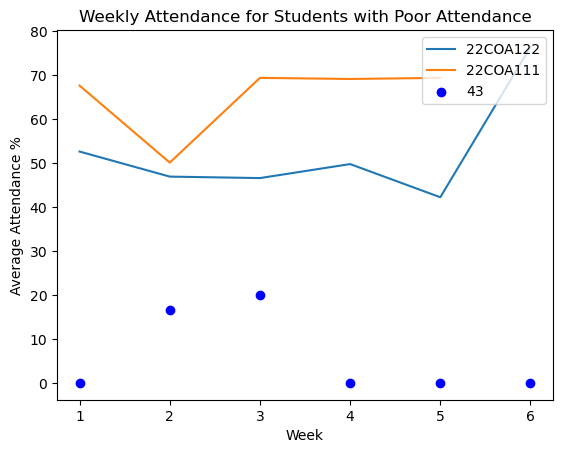

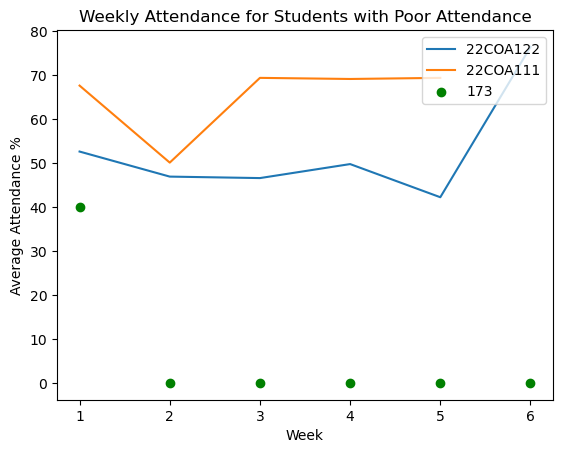

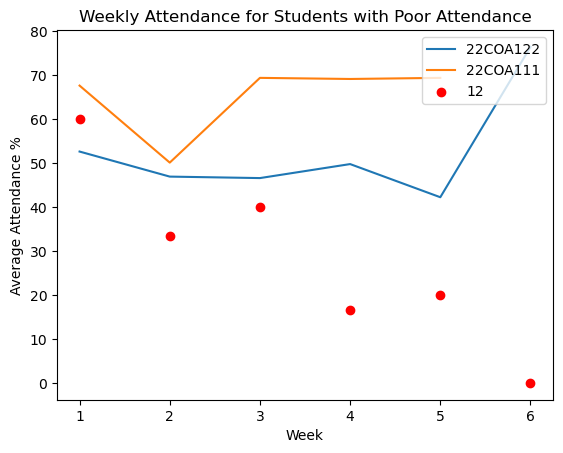

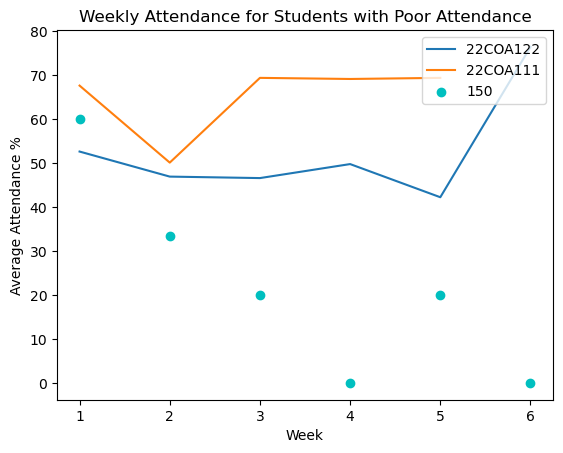

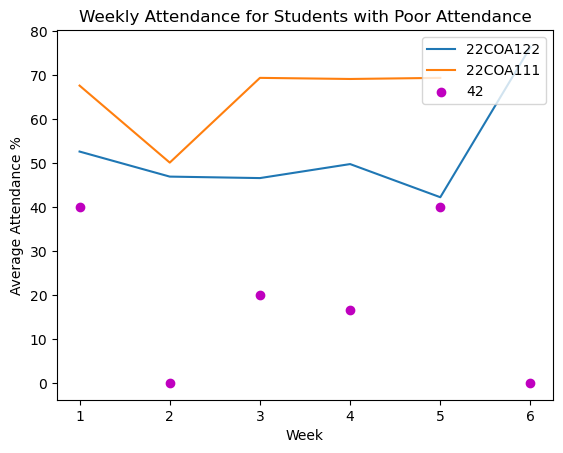

In [12]:
main_poor_att_2()

# Testing all functions in the Notebook

Running the function (define_variables_3) gives an output of the user inputted values which will be referred to later on in the code.

In [13]:
module_code_1, module_code_2 = define_variables_3()
print(module_code_1, module_code_2)


Enter a module code (e.g. 22COA122):22COA122
Enter a module code (e.g. 22COA111):22COA111
22COA122 22COA111


Running the function (read_sql_to_pd) simply reads the attendance and sessions data for two modules you have specified, and saves them as pandas dataframes, ready for cleaning and analysing.

In [14]:
df_att_1, df_ssn_1, df_att_2, df_ssn_2 = read_sql_to_pd(module_code_1,
                                                        module_code_2)
display(df_att_1, df_ssn_1, df_att_2, df_ssn_2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,17,18,19
s_id,,,,,,,,,,,,,,,,,
0,1.0,1.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,NaN,0.0,0.0,1.0,NaN,0.0
1,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0
2,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,NaN,0.0,0.0,1.0,NaN,1.0
3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,1.0,0.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0
4,1.0,1.0,NaN,1.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.0,0.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,1.0,NaN,1.0
239,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,NaN,0.0,1.0,NaN,1.0,1.0,1.0,NaN,0.0
240,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0


,Week,Day,Time,Lesson,Room,Excluded,Semester
s_id,,,,,,,
1,W1,Monday (03-10-2022),14:00 - 16:00,Lecture,CC012,,S1
2,W1,Thursday (06-10-2022),09:00 - 11:00,Computer Lab,N001...,,S1
3,W1,Thursday (06-10-2022),11:00 - 13:00,Computer Lab,N001...,,S1
4,W2,Monday (10-10-2022),14:00 - 16:00,Lecture,CC012,,S1
5,W2,Thursday (13-10-2022),09:00 - 11:00,Computer Lab,N001...,,S1
6,W2,Thursday (13-10-2022),11:00 - 13:00,Computer Lab,N001...,,S1
7,W3,Monday (17-10-2022),14:00 - 16:00,Lecture,CC012,,S1
8,W3,Thursday (20-10-2022),09:00 - 11:00,Computer Lab,N001...,,S1
9,W3,Thursday (20-10-2022),11:00 - 13:00,Computer Lab,N001...,,S1


,1,2,3,4,5,6,8,9,11,12,14
s_id,,,,,,,,,,,
0,1.0,1.0,0.0,None,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,None,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,None,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,NaN,NaN,1.0,None,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,None,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
238,0.0,0.0,1.0,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0
239,1.0,0.0,1.0,None,1.0,1.0,1.0,1.0,1.0,1.0,0.0
240,1.0,1.0,1.0,None,1.0,0.0,1.0,1.0,1.0,1.0,1.0


,Week,Day,Time,Lesson,Room,Excluded,Semester
s_id,,,,,,,
1,W1,Monday (03-10-2022),09:00 - 10:00,Lecture,U020,,S1
2,W1,Wednesday (05-10-2022),10:00 - 11:00,Lecture,SMB014,,S1
3,W2,Wednesday (12-10-2022),10:00 - 11:00,Lecture,SMB014,,S1
4,W2,Wednesday (12-10-2022),12:00 - 13:00,Tutorial,,,S1
5,W2,Thursday (13-10-2022),14:00 - 15:00,Lecture,CC011,,S1
6,W3,Wednesday (19-10-2022),10:00 - 11:00,Lecture,SMB014,,S1
7,W3,Wednesday (19-10-2022),12:00 - 13:00,Tutorial,,,S1
8,W3,Thursday (20-10-2022),14:00 - 15:00,Lecture,CC011,,S1
9,W4,Wednesday (26-10-2022),10:00 - 11:00,Lecture,SMB014,,S1


Running the function (modify_df_1) creates a table which merges the attendance and sessions data of module 1, as well as creating a new dataframe which shows weekly attendance for all students, as well as overall weekly attendance for the entire module.

In [15]:
stu_week_att_1,stu_avg_module_1 = modify_df_1(df_att_1, df_ssn_1)
display(stu_week_att_1,stu_avg_module_1)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,Week,Day,Time,Lesson,Room,Excluded,Semester
s_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,W1,Monday (03-10-2022),14:00 - 16:00,Lecture,CC012,,S1
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,W1,Thursday (06-10-2022),09:00 - 11:00,Computer Lab,N001...,,S1
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,W1,Thursday (06-10-2022),11:00 - 13:00,Computer Lab,N001...,,S1
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,W2,Monday (10-10-2022),14:00 - 16:00,Lecture,CC012,,S1
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,W2,Thursday (13-10-2022),09:00 - 11:00,Computer Lab,N001...,,S1
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,W2,Thursday (13-10-2022),11:00 - 13:00,Computer Lab,N001...,,S1
7,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,W3,Monday (17-10-2022),14:00 - 16:00,Lecture,CC012,,S1
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,W3,Thursday (20-10-2022),09:00 - 11:00,Computer Lab,N001...,,S1
9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,W3,Thursday (20-10-2022),11:00 - 13:00,Computer Lab,N001...,,S1


Week,W1,W2,W3,W4,W5,W6
s_id,,,,,,
0,66.666667,33.333333,0.000000,25.000000,33.333333,0.00000
1,66.666667,66.666667,66.666667,75.000000,66.666667,100.00000
2,66.666667,66.666667,66.666667,25.000000,33.333333,100.00000
3,0.000000,0.000000,33.333333,50.000000,66.666667,100.00000
4,66.666667,33.333333,33.333333,25.000000,33.333333,100.00000
...,...,...,...,...,...,...
239,66.666667,66.666667,33.333333,50.000000,66.666667,0.00000
240,66.666667,66.666667,66.666667,75.000000,66.666667,100.00000
241,66.666667,66.666667,66.666667,75.000000,33.333333,100.00000


Running the function (modify_df_2) creates a table which merges the attendance and sessions data of module 2, as well as creating a new dataframe which shows weekly attendance for all students, as well as overall weekly attendance for the entire module.

In [16]:
stu_week_att_2,stu_avg_module_2 = modify_df_2(df_att_2, df_ssn_2)
display(stu_week_att_2,stu_avg_module_2)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,Week,Day,Time,Lesson,Room,Excluded,Semester
s_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,W1,Monday (03-10-2022),09:00 - 10:00,Lecture,U020,,S1
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,W1,Wednesday (05-10-2022),10:00 - 11:00,Lecture,SMB014,,S1
3,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,W2,Wednesday (12-10-2022),10:00 - 11:00,Lecture,SMB014,,S1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,W2,Wednesday (12-10-2022),12:00 - 13:00,Tutorial,,,S1
5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,W2,Thursday (13-10-2022),14:00 - 15:00,Lecture,CC011,,S1
6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,W3,Wednesday (19-10-2022),10:00 - 11:00,Lecture,SMB014,,S1
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,W3,Thursday (20-10-2022),14:00 - 15:00,Lecture,CC011,,S1
9,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,W4,Wednesday (26-10-2022),10:00 - 11:00,Lecture,SMB014,,S1
11,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,W4,Thursday (27-10-2022),14:00 - 15:00,Lecture,CC011,,S1


Week,W1,W2,W3,W4,W5
s_id,,,,,
0,100.00000,33.333333,100.000000,50.000000,0.000000
1,100.00000,66.666667,100.000000,100.000000,100.000000
2,100.00000,33.333333,50.000000,50.000000,0.000000
3,0.00000,66.666667,50.000000,50.000000,50.000000
4,50.00000,33.333333,50.000000,50.000000,50.000000
...,...,...,...,...,...
239,50.00000,66.666667,100.000000,100.000000,50.000000
240,100.00000,66.666667,50.000000,100.000000,100.000000
241,100.00000,66.666667,100.000000,100.000000,100.000000


Running the function (merge_both_modules) merges both dataframes for the separate modules into a single dataframe containing all the data available.

In [17]:
merged_df = merge_both_modules(stu_week_att_1,stu_week_att_2)
display(merged_df)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,Week,Day,Time,Lesson,Room,Excluded,Semester
s_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,W1,Monday (03-10-2022),14:00 - 16:00,Lecture,CC012,,S1
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,W1,Thursday (06-10-2022),09:00 - 11:00,Computer Lab,N001...,,S1
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,W1,Thursday (06-10-2022),11:00 - 13:00,Computer Lab,N001...,,S1
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,W2,Monday (10-10-2022),14:00 - 16:00,Lecture,CC012,,S1
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,W2,Thursday (13-10-2022),09:00 - 11:00,Computer Lab,N001...,,S1
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,W2,Thursday (13-10-2022),11:00 - 13:00,Computer Lab,N001...,,S1
7,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,W3,Monday (17-10-2022),14:00 - 16:00,Lecture,CC012,,S1
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,W3,Thursday (20-10-2022),09:00 - 11:00,Computer Lab,N001...,,S1
9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,W3,Thursday (20-10-2022),11:00 - 13:00,Computer Lab,N001...,,S1


Running the function (wkly_stu_avg_merged) creates a new dataframe from the merged_df above. This new dataframe shows weekly average, student average, and weekly average attendance for all students and all modules combined as overall averages for both modules.

In [18]:
stu_avg_module = wkly_stu_avg_merged(merged_df)
display(stu_avg_module)

Week,W1,W2,W3,W4,W5,W6,stu_avg
s_id,,,,,,,
0,80.000000,33.333333,40.000000,33.333333,20.000000,0.00000,34.444444
1,80.000000,66.666667,80.000000,83.333333,80.000000,100.00000,81.666667
2,80.000000,50.000000,60.000000,33.333333,20.000000,100.00000,57.222222
3,0.000000,33.333333,40.000000,50.000000,60.000000,100.00000,47.222222
4,60.000000,33.333333,40.000000,33.333333,40.000000,100.00000,51.111111
...,...,...,...,...,...,...,...
239,60.000000,66.666667,60.000000,66.666667,60.000000,0.00000,52.222222
240,80.000000,66.666667,60.000000,83.333333,80.000000,100.00000,78.333333
241,80.000000,66.666667,80.000000,83.333333,60.000000,100.00000,78.333333


Running the function (create_poor_att_df) gives an output dataframe of students with poor attendance according to the set criteria.

In [19]:
poor_att_df, dept_avg = create_poor_att_df(stu_avg_module)
display(poor_att_df, dept_avg)

Week,W1,W2,W3,W4,W5,W6,stu_avg
s_id,,,,,,,
242,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
18,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
190,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
54,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
117,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
169,0.0,16.666667,0.0,0.000000,0.0,0.0,2.777778
70,20.0,0.000000,0.0,0.000000,0.0,0.0,3.333333
43,0.0,16.666667,20.0,0.000000,0.0,0.0,6.111111
24,20.0,0.000000,0.0,0.000000,20.0,0.0,6.666667


58.068118369625914

Running the function (display_coloured_table) applies the colour function (highlight_attendance_2) to the poor attendance dataframe above.

In [20]:
poor_att_df_colour = display_coloured_table(poor_att_df,
                                            highlight_attendance_2, dept_avg)
display(poor_att_df_colour)

Week,W1,W2,W3,W4,W5,W6,stu_avg
s_id,,,,,,,
242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
169,0.000000,16.666667,0.000000,0.000000,0.000000,0.000000,2.777778
70,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.333333
43,0.000000,16.666667,20.000000,0.000000,0.000000,0.000000,6.111111
24,20.000000,0.000000,0.000000,0.000000,20.000000,0.000000,6.666667


Running the function (sample_df_poor_att) creates a new dataframe with 5 randomly sampled students with poor attendance, which are going to be used to plot figures.

In [21]:
stu_random, wkly_avg_module = sample_df_poor_att(stu_avg_module, poor_att_df)
print(f"\nAttendance record for random sample of students with low attendance:")
display(stu_random)


Attendance record for random sample of students with low attendance:


Week,W1,W2,W3,W4,W5,W6
s_id,,,,,,
43,0.000000,16.666667,20.000000,0.000000,0.000000,0.00000
173,40.000000,0.000000,0.000000,0.000000,0.000000,0.00000
12,60.000000,33.333333,40.000000,16.666667,20.000000,0.00000
150,60.000000,33.333333,20.000000,0.000000,20.000000,0.00000
42,40.000000,0.000000,20.000000,16.666667,40.000000,0.00000
wkly_avg,58.592965,48.492462,55.678392,56.197655,53.065327,76.38191


Running the function (poor_att_sample_graph) plots a series of figures showing the weekly attendance of each student as a scatter, as well as the overall weekly average attendance of each separate module as its own line plot.

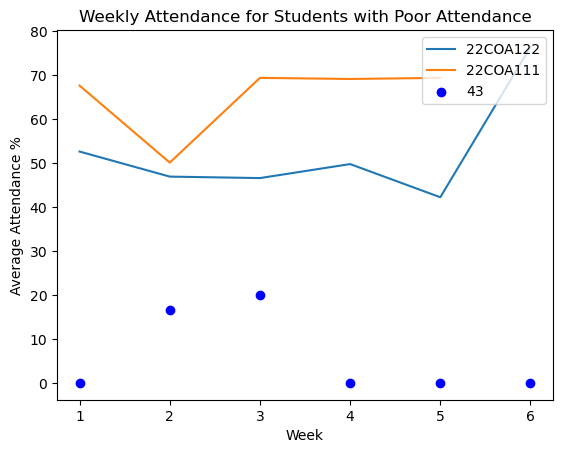

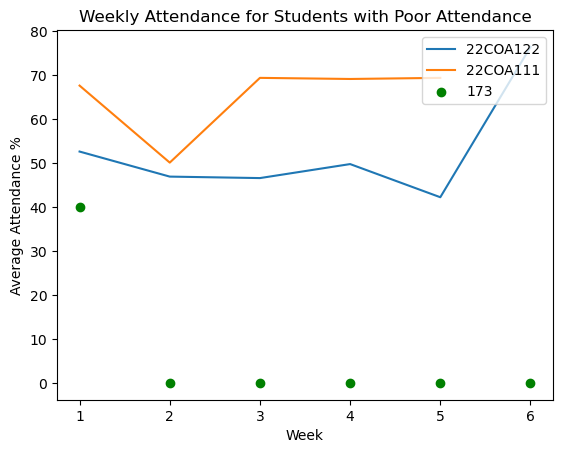

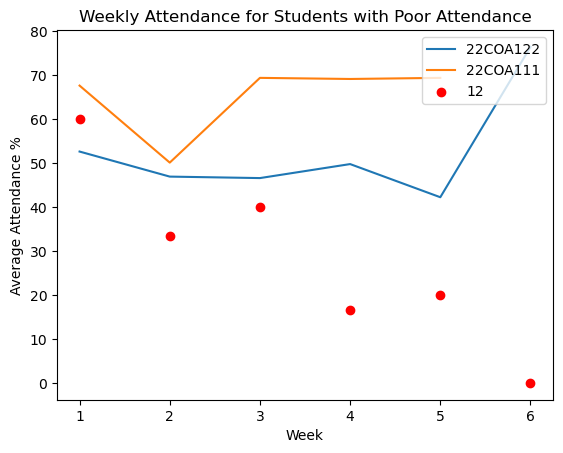

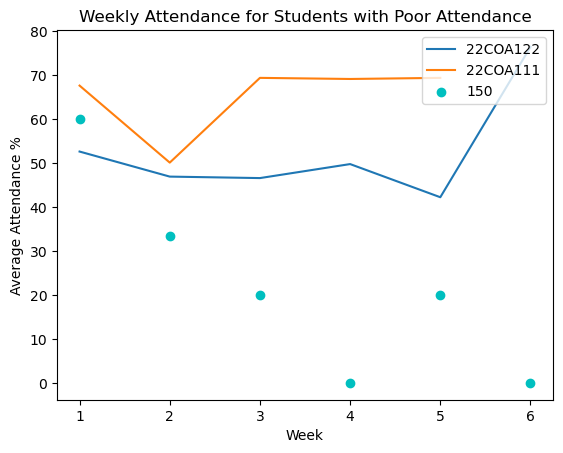

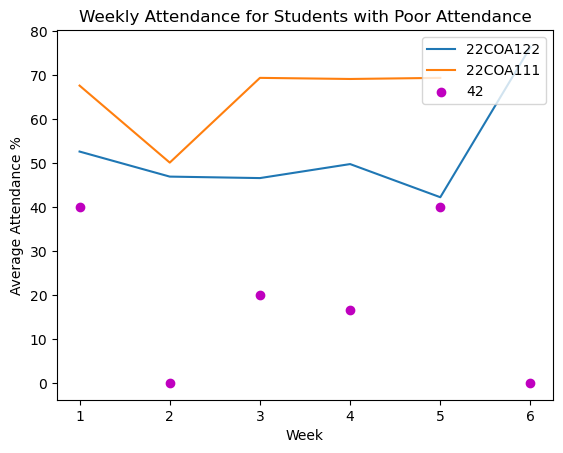

None

In [22]:
poor_att_vis = poor_att_sample_graph(stu_avg_module_1, stu_avg_module_2,
                                     stu_random, module_code_1, module_code_2)
display(poor_att_vis)